In [1]:
# Add Matplotlib inline magic command.
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load CSVs from.
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a Pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a Pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# CITY DATA - get all the columns and rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# CITY DATA - another method for finding null values in your data.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# CITY DATA - inspect the types of data in the columns.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# CITY DATA - find how many data points there are for each type of city.
city_data_df.type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [10]:
# RIDE DATA - get all the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# RIDE DATA - similarly, perform the same null value calculation.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# RIDE DATA - look at column data types.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Combine the data (MERGE) into a single dataset.
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# And displayed the joint DataFrame.
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [25]:
# Get the number of rides for Urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

# Get the number of rides for Suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

# Get the number of rides for Rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [27]:
# Get the average fare for Urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

# Get the average fare for Suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

# Get the average fare for Rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [29]:
# Get the average number of drivers for Urban cities.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

# Get the average number of drivers for Suburban cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

# Get the average number of drivers for Rural cities.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

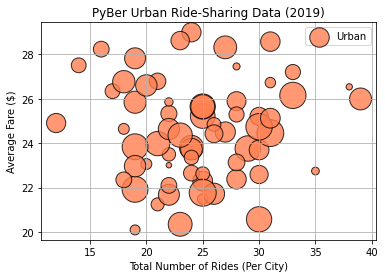

In [38]:
# Create the Urban cities bubble chart.
plt.scatter(urban_ride_count, urban_avg_fare,
            label="Urban",
            s=urban_driver_count * 10,
            edgecolor="black",
            linewidths=1,
            color="coral",
            alpha=0.8)
plt.grid(True)
plt.title("PyBer Urban Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Add a legend.
plt.legend()

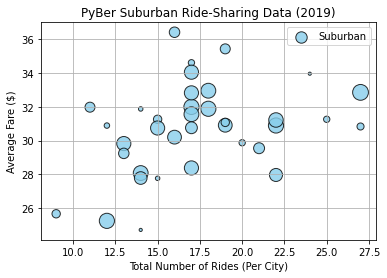

In [40]:
# Create the Suburban cities bubble chart.
plt.scatter(suburban_ride_count, suburban_avg_fare,
            label="Suburban",
            s=suburban_driver_count * 10,
            edgecolor="black",
            linewidths=1,
            color="skyblue",
            alpha=0.8)
plt.grid(True)
plt.title("PyBer Suburban Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Add a legend.
plt.legend()

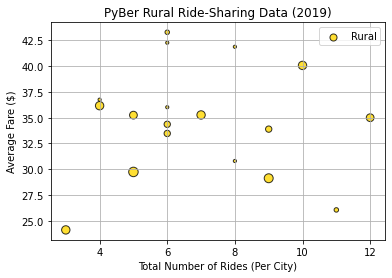

In [41]:
# Create the Rural cities bubble chart.
plt.scatter(rural_ride_count, rural_avg_fare,
            label="Rural",
            s=rural_driver_count * 10,
            edgecolor="black",
            linewidths=1,
            color="gold",
            alpha=0.8)
plt.grid(True)
plt.title("PyBer Rural Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Add a legend.
plt.legend()

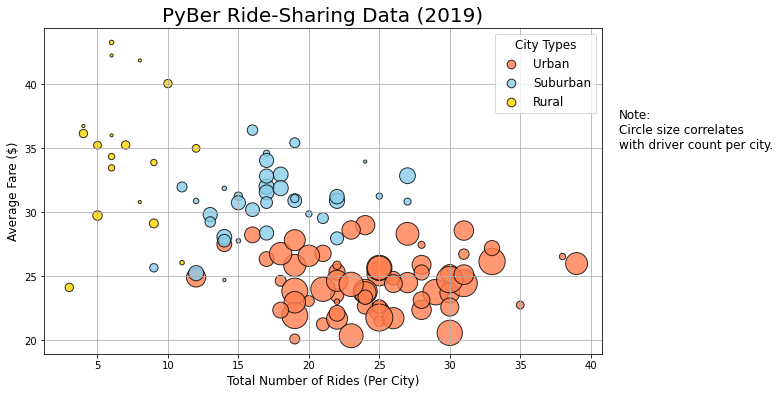

In [75]:
# Create a bubble chart for all cities (combine our current charts).
plt.scatter(urban_ride_count, urban_avg_fare,
            label="Urban",
            s=urban_driver_count * 10,
            edgecolor="black",
            linewidths=1,
            color="coral",
            alpha=0.8)

plt.scatter(suburban_ride_count, suburban_avg_fare,
            label="Suburban",
            s=suburban_driver_count * 10,
            edgecolor="black",
            linewidths=1,
            color="skyblue",
            alpha=0.8)

plt.scatter(rural_ride_count, rural_avg_fare,
            label="Rural",
            s=rural_driver_count * 10,
            edgecolor="black",
            linewidths=1,
            color="gold",
            alpha=0.8)



# Add some formatting.
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)

# Create a format the legend.
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add an informative note.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

### ADDED TO CORRECT SIZING ###
plt.rcParams["figure.figsize"] = (8,6)
###############################

# Save this graph to a picture file.
plt.savefig("analysis/Fig1.png", dpi=300, bbox_inches = "tight")

fig_width, fig_height = plt.gcf().get_size_inches()

In [76]:
# Get summary statistics for the urban DataFrame.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [77]:
# Get summary statistics for the suburban DataFrame.
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [ ]:
# Get summary statistics for the rural DataFrame.
rural_cities_df.describe()

In [ ]:
print("ohno")